In [1]:
import torch
import torchvision
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
import numpy as np

In [2]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.1307,),std=(0.3081))
])

In [4]:
training_data=torchvision.datasets.MNIST(root='C:/Datasets',train=True, transform=transform,download=True)

In [5]:
trainLoader=DataLoader(training_data,batch_size=64,shuffle=True)

In [6]:
for images,labels in trainLoader:
    print(images.size(),labels.size())
    break
    

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [7]:
batches=iter(trainLoader)

In [8]:
batches

In [9]:
one_batch=next(batches)

In [10]:
one_batch[1].size()

torch.Size([64])

In [11]:
images,labels=one_batch
print(images.size(),labels.size())

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [12]:
import matplotlib.pyplot as plt

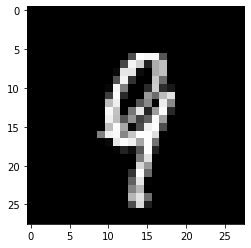

In [13]:
plt.imshow(torch.squeeze(images[0]),cmap='Greys_r')

In [14]:
testing_data=torchvision.datasets.MNIST(root='C:/Datasets',train=False, transform=transform,download=True)

In [15]:
testLoader=DataLoader(testing_data,batch_size=64,shuffle=True)

In [16]:
len(one_batch[1])

64

In [17]:
import torch.nn as nn

In [18]:
class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden=nn.Linear(28*28,512)
        self.h2=nn.Linear(512,256)
        self.output=nn.Linear(256,10)
        self.sigmoid=nn.Sigmoid()
        self.softmax=nn.Softmax(dim=1)
    
    def forward(self,x):
        x=self.hidden(x)
        x=self.sigmoid(x)
        x=self.sigmoid(self.h2(x))
        x=self.output(x)
        x=self.softmax(x)
        return x
        

In [19]:
def getAccuracy(images,labels):
    accuracy=[]
    for i in range(len(images)):
        if torch.argmax(images[i]).item()==labels[i].item():
            accuracy.append(1)
        else:
            accuracy.append(0)
    return sum(accuracy)/len(accuracy)

def train(model,loader,criterion,optimizer,num_epochs=5):
    metrics={
        'Accuracy':[],
        'Loss':[]
    }
    for epoch in range(num_epochs):
        for images,labels in loader:
            optimizer.zero_grad()
            images=images.view(images.shape[0],-1)
            outputs=model(images)
            loss=criterion(outputs,labels)
            loss.backward()
            optimizer.step()
            metrics['Loss'].append(loss.item())
            accuracy=getAccuracy(outputs,labels)
            metrics['Accuracy'].append(accuracy)
        print('Accuracy/Epoch:',100*sum(metrics['Accuracy'])/len(metrics['Accuracy']))
        print('Loss/Epoch:',sum(metrics['Loss'])/len(metrics['Loss']))
    return metrics
    

In [20]:
model=Net()
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters())

In [21]:
model

Net(
  (hidden): Linear(in_features=784, out_features=512, bias=True)
  (h2): Linear(in_features=512, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [22]:
metrics=train(model,trainLoader,criterion,optimizer,num_epochs=10)

Accuracy/Epoch: 84.99466950959489
Loss/Epoch: 1.6244249584069892
Accuracy/Epoch: 90.17607276119404
Loss/Epoch: 1.5679496953101046
Accuracy/Epoch: 92.3790644989339
Loss/Epoch: 1.5440270909622533
Accuracy/Epoch: 93.64672174840085
Loss/Epoch: 1.5301738741682536
Accuracy/Epoch: 94.48694029850746
Loss/Epoch: 1.5210187177922425
Accuracy/Epoch: 95.0926172707889
Loss/Epoch: 1.5143890508583613
Accuracy/Epoch: 95.55784533962839
Loss/Epoch: 1.5092880139073475
Accuracy/Epoch: 95.92030083955224
Loss/Epoch: 1.5053417570650705
Accuracy/Epoch: 96.21942371475953
Loss/Epoch: 1.5020622264093428
Accuracy/Epoch: 96.46255330490405
Loss/Epoch: 1.4993957483183855


In [23]:
def plotMetrics(metric):
    plt.figure(figsize=(8,8))
    plt.plot([x for x in range(len(metric))],metric)

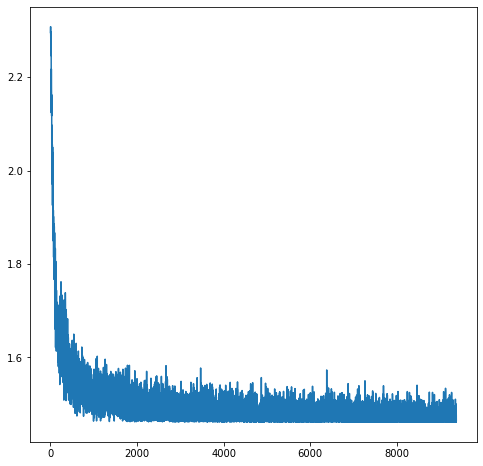

In [24]:
plotMetrics(metrics['Loss'])

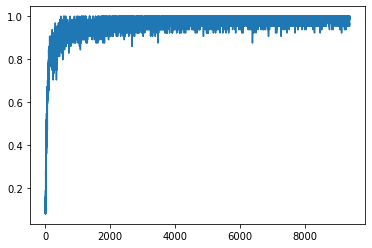

In [25]:
plt.plot(metrics['Accuracy'])

In [26]:
correct = 0
total = 0
with torch.no_grad():
    for data in testLoader:
        images, labels = data
        images=images.view(images.shape[0],-1)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 97 %
